# Hoja de trabajo # 1

Text Mining & Image Recognition

Eddson Sierra

In [358]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

## Problema 1

Desarrolle una función la cual reciba dos parámetros, una imagen y un entero llamado color, la
función debe devolver una imagen la cual tenga activos los canales de color según los siguientes
puntos:
* Si el parámetro color vale 1, la imagen debe mostrar activos únicamente el color azul.
* Si el parámetro color vale 2, la imagen debe mostrar activos únicamente el color verde.
* Si el parámetro color vale 3, la imagen debe mostrar activos únicamente el color rojo.
* Si el parámetro color vale 10, la imagen debe mostrar activos únicamente los colores rojo y
verde.
* Si el parámetro color vale 20, la imagen debe mostrar activos únicamente los colores verde y
azul.
* Si el parámetro color vale 30, la imagen debe mostrar activos únicamente los colores azul y
rojo.

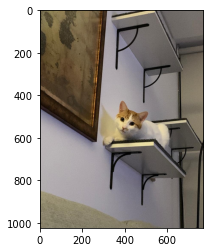

In [365]:
# cargamos la imagen original
img = cv2.imread('kit.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [131]:
def activar_canal(img, color):
    alto = img.shape[0]
    ancho = img.shape[1]
    
    imgSalida = np.zeros((alto, ancho, 3))
    
    for i in range(0,alto):
        for j in range(0,ancho):
            pixel = img[i,j]
            blue = pixel[2]
            green = pixel[1]
            red = pixel[0]
            if color == 1:
                imgSalida[i,j] = [red,0,0]
            elif color == 2:
                imgSalida[i,j] = [0,green,0]
            elif color == 3:
                imgSalida[i,j] = [0,0,blue]
            elif color == 10:
                imgSalida[i,j] = [red,green,0]
            elif color == 20:
                imgSalida[i,j] = [0,green,blue]
            elif color == 30:
                imgSalida[i,j] = [red,0,blue]
            
    cv2.imwrite('ImagenSalida_'+str(color)+'.jpg',imgSalida)

In [132]:
# podemos generar todas las imagenes para todas las opciones de color
canales_activos = [1,2,3,10,20,30]
 
for canal in canales_activos:
    activar_canal(img, canal)

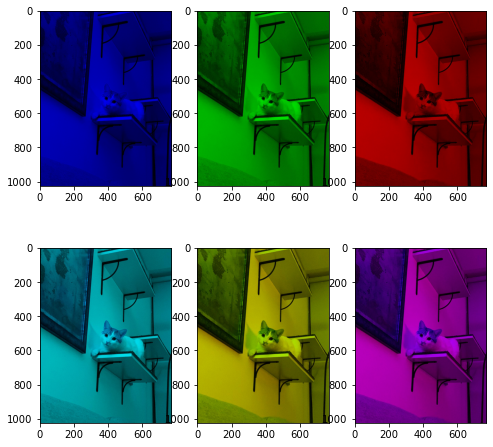

In [149]:
fig = plt.figure(figsize=(8, 8))

imgTemp = cv2.imread('ImagenSalida_1.jpg')
imgTemp = cv2.cvtColor(imgTemp, cv2.COLOR_BGR2RGB)
fig.add_subplot(2, 3, 1)
plt.imshow(imgTemp)

imgTemp = cv2.imread('ImagenSalida_2.jpg')
imgTemp = cv2.cvtColor(imgTemp, cv2.COLOR_BGR2RGB)
fig.add_subplot(2, 3, 2)
plt.imshow(imgTemp)

imgTemp = cv2.imread('ImagenSalida_3.jpg')
imgTemp = cv2.cvtColor(imgTemp, cv2.COLOR_BGR2RGB)
fig.add_subplot(2, 3, 3)
plt.imshow(imgTemp)

imgTemp = cv2.imread('ImagenSalida_10.jpg')
imgTemp = cv2.cvtColor(imgTemp, cv2.COLOR_BGR2RGB)
fig.add_subplot(2, 3, 4)
plt.imshow(imgTemp)

imgTemp = cv2.imread('ImagenSalida_20.jpg')
imgTemp = cv2.cvtColor(imgTemp, cv2.COLOR_BGR2RGB)
fig.add_subplot(2, 3, 5)
plt.imshow(imgTemp)

imgTemp = cv2.imread('ImagenSalida_30.jpg')
imgTemp = cv2.cvtColor(imgTemp, cv2.COLOR_BGR2RGB)
fig.add_subplot(2, 3, 6)
plt.imshow(imgTemp)

plt.show()

## Problema 2

En el .zip del laboratorio se le compartió un conjunto de imágenes en escala de grises, estas imágenes
fueron creadas utilizando una escala de grises en 3D, cree una función que dadas las 3 imágenes se
construya la imagen original a color.

In [248]:
# Creamos una función que lee las imágenes, las convierte de BGR a RGB
def cargar_imagen(imagen_str_jpg):
    imgTemp = cv2.imread(imagen_str_jpg)
    imgTemp = cv2.cvtColor(imgTemp, cv2.COLOR_BGR2RGB)
    return imgTemp

In [263]:
# Cargamos las imágenes
# Imagen 1
img1_gray_azul = cargar_imagen('imagen1_salida_gray_azul.jpg')
img1_gray_rojo = cargar_imagen('imagen1_salida_gray_rojo.jpg')
img1_gray_verde = cargar_imagen('imagen1_salida_gray_verde.jpg')

# Imagen 2
img2_gray_azul = cargar_imagen('imagen2_salida_gray_azul.jpg')
img2_gray_rojo = cargar_imagen('imagen2_salida_gray_rojo.jpg')
img2_gray_verde = cargar_imagen('imagen2_salida_gray_verde.jpg')

# Perro
perro_gray_azul = cargar_imagen('perro_salida_gray_azul.jpg')
perro_gray_rojo = cargar_imagen('perro_salida_gray_rojo.jpg')
perro_gray_verde = cargar_imagen('perro_salida_gray_verde.jpg')

In [264]:
def recrear_imagen(img_red, img_green, img_blue, str_nombre):
    alto = img_red.shape[0]
    ancho = img_red.shape[1]
    img_original = np.zeros((alto, ancho, 3))
    
    for i in range(0,alto):
        for j in range(0,ancho):
            img_original[i,j][2] = img_red[i,j][0]
            img_original[i,j][1] = img_green[i,j][1]
            img_original[i,j][0] = img_blue[i,j][2]
       
    cv2.imwrite('ImagenOriginal'+str(str_nombre)+'.jpg',img_original)
    return img_original

Ahora utilizamos la función para generar la imagen original a partir de las grises:

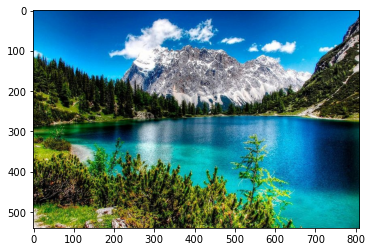

In [265]:
imagen1_original = recrear_imagen(img1_gray_rojo, img1_gray_verde, img1_gray_azul,'_1')
img1 = cv2.imread('ImagenOriginal_1.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)

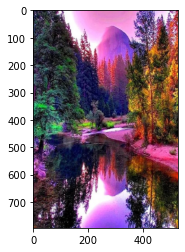

In [266]:
imagen2_original = recrear_imagen(img2_gray_rojo, img2_gray_verde, img2_gray_azul,'_2')
img2 = cv2.imread('ImagenOriginal_2.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

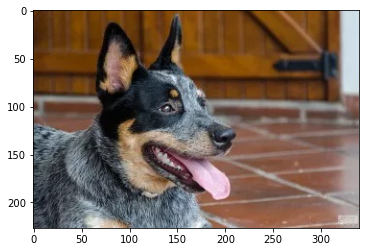

In [267]:
perro_original = recrear_imagen(perro_gray_rojo, perro_gray_verde, perro_gray_azul,'_perro')
perro = cv2.imread('ImagenOriginal_perro.jpg')
perro = cv2.cvtColor(perro, cv2.COLOR_BGR2RGB)
plt.imshow(perro)

## Problema 3
Cree una función que dada una imagen cree una escala de grises en tres dimensiones, tome en
cuenta que su función debe crear 3 imágenes como salida. Para entregar este ejercicio debe incluir
una las imágenes que haya utilizado como prueba y el resultado de las mismas, no puede utilizar la
imagen del Problema 2.

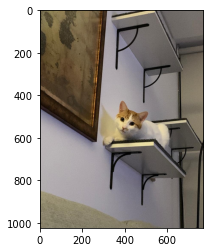

In [268]:
# Utilizando la imagen de prueba usada en el problema 1
plt.imshow(img)
plt.show()

In [272]:
def escala_grises(imagen):
    alto = imagen.shape[0]
    ancho = imagen.shape[1]
    gray_green = np.zeros((alto, ancho, 3))
    gray_blue = np.zeros((alto, ancho, 3))
    gray_red = np.zeros((alto, ancho, 3))
    
    for i in range(0,alto):
        for j in range(0,ancho):
            pixel = img[i,j]
            gray_blue[i,j] = pixel[2]
            gray_green[i,j] = pixel[1]
            gray_red[i,j] = pixel[0] 
            
    cv2.imwrite('Gray_red.jpg',gray_red)
    cv2.imwrite('Gray_blue.jpg',gray_blue)
    cv2.imwrite('Gray_green.jpg',gray_green)
    
    return gray_red, gray_green, gray_blue

In [274]:
gray_red, gray_green, gray_blue = escala_grises(img)

Observamos que cada una de las escalas de grises está en 3 dimensiones:

In [278]:
print("Gray Red: ",gray_red.shape)
print("Gray Green: ",gray_green.shape)
print("Gray Blue: ",gray_blue.shape)

Gray Red:  (1024, 768, 3)
Gray Green:  (1024, 768, 3)
Gray Blue:  (1024, 768, 3)


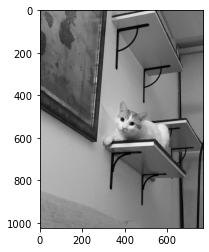

In [279]:
GrayRed = cv2.imread('Gray_red.jpg')
GrayRed = cv2.cvtColor(GrayRed, cv2.COLOR_BGR2RGB)
plt.imshow(GrayRed)

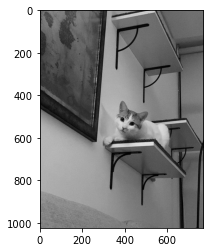

In [283]:
GrayGreen = cv2.imread('Gray_green.jpg')
GrayGreen = cv2.cvtColor(GrayGreen, cv2.COLOR_BGR2RGB)
plt.imshow(GrayGreen)

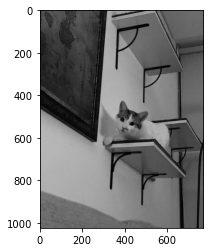

In [284]:
GrayBlue = cv2.imread('Gray_blue.jpg')
GrayBlue = cv2.cvtColor(GrayBlue, cv2.COLOR_BGR2RGB)
plt.imshow(GrayBlue)

## Problema 4
Cree una función que dada una imagen, muestre el histograma de cada canal de color y el de
escala de grises (utilice un promedio aritmético para su escala de grises, no puede usar funciones
de opencv), sus histogramas deben incluir una línea vertical la cual muestre el valor de la media
de la distribución.

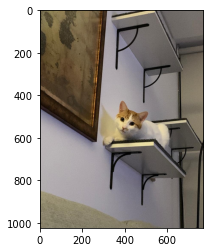

In [366]:
# Imagen a utilizar
plt.imshow(img)
plt.show()

In [498]:
def histogramas(imagen):
    alto = imagen.shape[0]
    ancho = imagen.shape[1]
    
    red_pixels = imagen.reshape(ancho*alto,3)[:,0]
    green_pixels = imagen.reshape(ancho*alto,3)[:,1]
    blue_pixels = imagen.reshape(ancho*alto,3)[:,2]
    gray_pixels = np.zeros_like(img)
    
    for i in range(0,alto):
        for j in range(0,ancho):
            pixel = img[i,j]    
            gray_pixels[i,j] = np.mean(pixel) 
            
    gray_pixels = gray_pixels.reshape(ancho*alto,3)[:,0]
    
    fig = plt.figure(figsize=(10, 10))
    fig.add_subplot(2,2,1)
    histograma_rojo = plt.hist(red_pixels, bins = 255, color='red')
    media_rojo = plt.axvline(np.mean(red_pixels), color='k', linestyle='dashdot', linewidth=1)
    fig.add_subplot(2,2,2)
    histograma_verde = plt.hist(green_pixels, bins = 255, color='green')
    media_verde = plt.axvline(np.mean(green_pixels), color='k', linestyle='dashdot', linewidth=1)
    fig.add_subplot(2,2,3)
    histograma_azul = plt.hist(blue_pixels, bins = 255, color='blue')
    media_azul = plt.axvline(np.mean(blue_pixels), color='k', linestyle='dashdot', linewidth=1)
    fig.add_subplot(2,2,4)
    histograma_gris = plt.hist(gray_pixels, bins = 255, color = 'gray')
    media_gris = plt.axvline(np.mean(gray_pixels), color='k', linestyle='dashdot', linewidth=1)


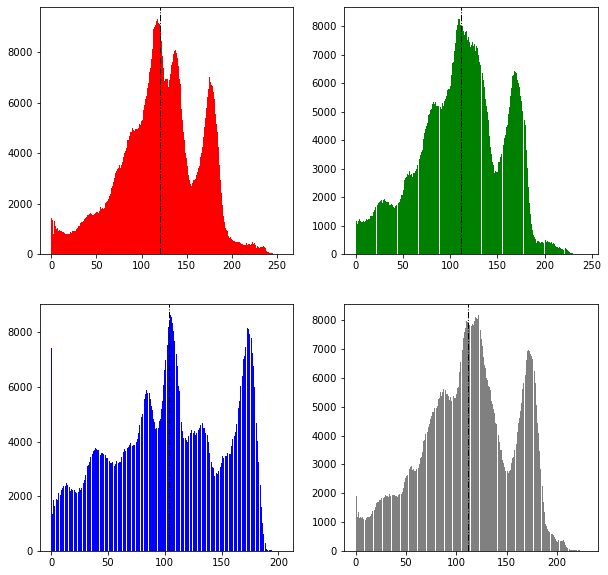

In [499]:
histogramas(img)

## Problema 5

Investigue en que consiste el enfoque de escala de grises ponderado, luego de esto implemente una
función que dada una imagen, realice una escala de grises ponderada (notar que no existe una
solución única).

**Enfoque de escala de grises ponderado**

El enfoque de escala de grises consiste en obtener el valor del pixel con un promedio ponderado del valor de los 3 canales de color asignándole un mayor peso al color verde ya que se ha demostrado en estudios que el ojo humano es más sensible a este color. 

Una forma clásica de esta ponderación es: 

$$Ponderado = (0.299)*Azul + (0.587)*Verde + (0.11)*Rojo$$

In [503]:
def gris_ponderado(imagen):
    alto = imagen.shape[0]
    ancho = imagen.shape[1]
    gray_ponderado = np.zeros_like(imagen)
    
    for i in range(0,alto):
        for j in range(0,ancho):
            pixel = img[i,j]
            gray_ponderado[i,j] = int(0.299*pixel[2]+0.587*pixel[1]+0.11*pixel[0])
    
    cv2.imwrite('gris_ponderado.jpg',gray_ponderado)
    return gray_ponderado

In [505]:
img_gray_ponderado = gris_ponderado(img)

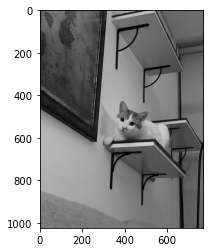

In [506]:
Gray_w = cv2.imread('gris_ponderado.jpg')
Gray_w = cv2.cvtColor(Gray_w, cv2.COLOR_BGR2RGB)
plt.imshow(Gray_w)

## Problema 6

Investigue brevemente en que consiste el espacio de color HSV y como se mapean colores a dicho
espacio, para entregar este ejercicio puede hacer con un archivo PDF.

**Espacio de color HSV**

En el espacio de color HSV, los colores se especifican mediante 3 componentes: matiz (hue), saturación (saturation) y valor/brillo (value o brightness). Se muestra en una pirámide invertida como en la siguiente figura:

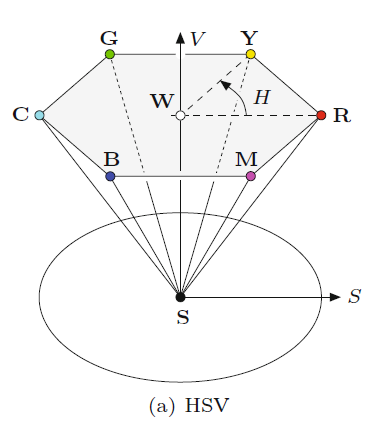

El eje vertical representa el brillo V, el horizontal representa la satuación S y en ángulo H (el matiz). Los colores primarios (rojo, azul y verde) y los colores derivados (amarillo, cyan y magenta) son las esquinas de la base de la pirámide. Aunque la pirámide invertida es la forma de reprentar el espacio HSV, el espacio es en realidad un cilindo como se muestra en la siguiente figura:

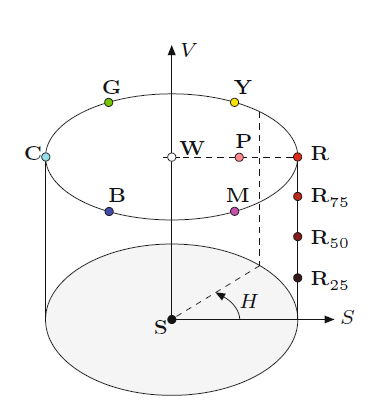

**Conversión de RGB a HSV**

Para convertir RGB a HSV primero se calculan S y V, de acuerdo con:

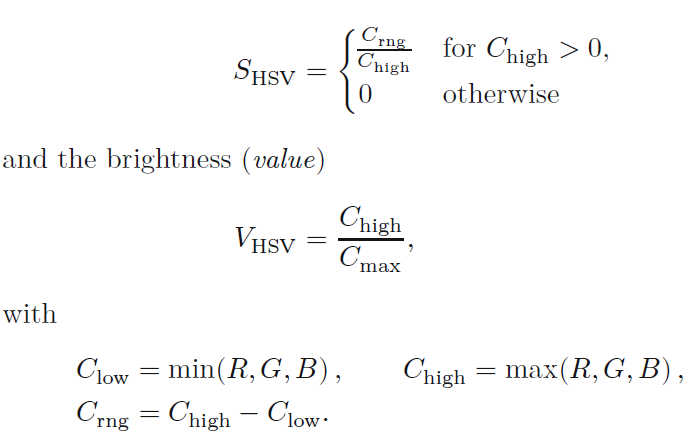

Para el caso de un pixel acromático (gris) H no está definido, mientras que S y V son cero. 
Para calcular H, primero se normaliza cada componente de la siguiente forma:
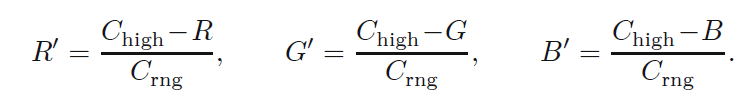

Luego se calcula un H preliminar dependiendo de cual de los 3 componentes originales tenga el máximo valor: 

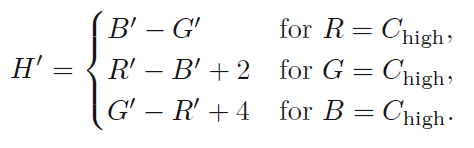

Finalmente, el resultado de H preliminar debe normalizarse para que quede en el intervalo de [0,1] de la siguiente forma:
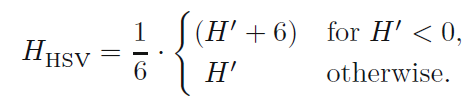


**Ejemplo**

Sabemos que el color magenta corresponde a Red + Blue, en un vector RGB se vería así:

In [507]:
magenta = np.array([1,0,1])
magenta

array([1, 0, 1])

Seguimos los pasos para convertir el magenta de RGB a HSV. Primero identificamos, el Cmax, Cmin y Crng. 

In [510]:
Cmax = max(magenta)
Cmin = min(magenta)
Crng = Cmax - Cmin

In [513]:
S = Crng/Cmax
V = Cmax/Cmax

Normalizamos los valores RGB:

In [514]:
Rp = (Cmax - magenta[0])/Crng
Gp = (Cmax - magenta[1])/Crng
Bp = (Cmax - magenta[2])/Crng
print("Rp: ",Rp)
print("Gp: ",Gp)
print("Bp: ",Bp)

Rp:  0.0
Gp:  1.0
Bp:  0.0


En este caso el valor máximo lo tenían R y B. 

In [516]:
Hp = Bp - Gp
Hp

-1.0

El valor de H es el valor de H preliminar más 6 multiplicado por 1/6 si H preliminar es menor que 0.

In [518]:
H = 1/6*(Hp+6)
H

0.8333333333333333

Magenta en HSV corresponde a 5/6, lo que nos dá el mismo valor calculado:

In [519]:
5/6

0.8333333333333334